# Projet Machine Learning DIA5 : MATHIOT Ariste, MAHCER Neil, MARCHAND Nicolas

Faire une description du projet : 

# Import des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Analyse du dataframe

In [ ]:
df=pd.read_csv("C:/Users/arist/Downloads/card_transdata.csv/card_transdata.csv",sep=",")
df.head(10)

Grâce au df.head on remarque que le df est bien importé avec des valeurs cohérentes.

In [ ]:
nombre_de_lignes = df.shape[0]
print(f"Nombre de lignes : {nombre_de_lignes}")

On a 1M de lignes ce qui veut dire que notre df contient beaucoup d'informations et donc on peut faire une analyse de qualité

In [ ]:
df.isnull().sum()

On a aucun null donc cela veut dire que notre data frame ne contient pas de valeurs manquantes 

In [ ]:
# Calcul des valeurs nulles et non nulles
total_nulls = df.isnull().sum().sum()
total_non_nulls = df.notnull().sum().sum()

# Préparation des données pour le barplot
counts = {
    'Null': total_nulls,
    'Non-Null': total_non_nulls
}

# Création du barplot
plt.figure(figsize=(6, 5))
plt.bar(counts.keys(), counts.values(), color=['orange', 'green'], edgecolor='black')
plt.title("Répartition des valeurs nulles et non nulles")
plt.ylabel("Nombre de valeurs")
plt.xlabel("Catégories")
plt.show()

In [ ]:
df.info()

Toutes nos valeurs sont du même type

In [ ]:
df.describe()

Analyse :
Le DataFrame est complet et bien préparé pour des analyses, car aucune valeur manquante n'est présente.
Les statistiques montrent une grande variabilité dans certaines colonnes, comme distance_from_last_transaction et distance_from_home, qui pourraient nécessiter une normalisation ou un traitement supplémentaire.
Les colonnes binaires comme used_chip, used_pin_number, et online_order semblent représenter des indicateurs booléens (0 ou 1).

In [8]:
# On compte le nombre de fraude

df.loc[df['fraud'] != 0, 'fraud'].sum()

87403.0

# Visualisation de la proportion du dataset

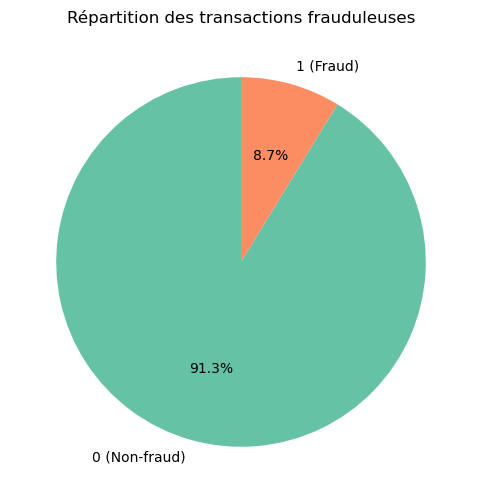

In [9]:
fraud_counts = df['fraud'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['0 (Non-fraud)', '1 (Fraud)'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title("Répartition des transactions frauduleuses")
plt.show()

On a un dataset unbalanced, c'est à dire qu'on a une grande majorité de non fraude(91.3%), il faudra faire attention et ne pas tester seulement l'accuracy

# Sans Scaler

In [21]:
X = df.loc[:100000].drop('fraud', axis=1)
y = df.loc[:100000,'fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_no_scaler = Pipeline([
    ('log_reg', LogisticRegression(max_iter=200))
])

pipeline_no_scaler.fit(X_train, y_train)
y_pred = pipeline_no_scaler.predict(X_test)
# Calcul des métriques de performance
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)

Accuracy: 0.9577014099530016


On a une très bonne précision mais cela ne veut pas dire grande chose pour l'instant a cause du df unbalanced

# Robust Scaler

In [11]:
pipeline_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('log_reg', LogisticRegression(max_iter=200))
])
pipeline_robust.fit(X_train, y_train)
y_pred = pipeline_robust.predict(X_test)
# Calcul des métriques de performance
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)

Accuracy: 0.9577014099530016


Même remarque que précedemment 

# Standard Scaler

Accuracy: 0.9584347188427053

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     27412
         1.0       0.89      0.59      0.71      2589

    accuracy                           0.96     30001
   macro avg       0.93      0.79      0.84     30001
weighted avg       0.96      0.96      0.95     30001


Confusion Matrix:
 [[27218   194]
 [ 1053  1536]]

ROC AUC Score: 0.965445829618366


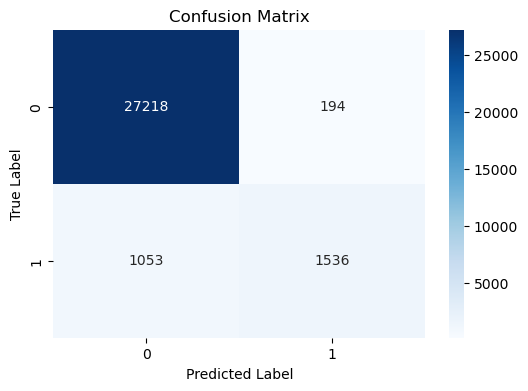

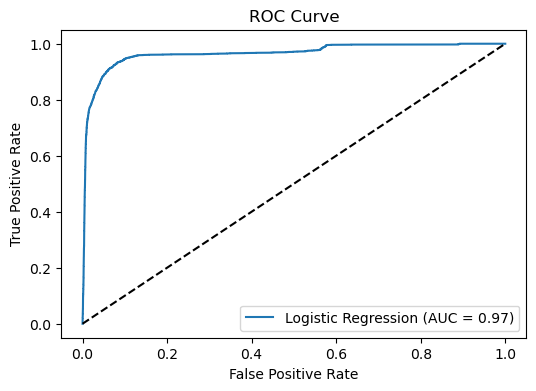

In [12]:
pipeline_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=200))
])
pipeline_standard.fit(X_train, y_train)
# Prédiction sur l'ensemble de test
y_pred = pipeline_standard.predict(X_test)
y_pred_proba = pipeline_standard.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques de performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Affichage des résultats
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nROC AUC Score:", roc_auc)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# PCA

In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),  # Ajustez le nombre de composantes selon vos besoins
    ('log_reg', LogisticRegression(max_iter=200))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     27412
         1.0       0.53      0.05      0.10      2589

    accuracy                           0.91     30001
   macro avg       0.73      0.52      0.53     30001
weighted avg       0.88      0.91      0.88     30001



On remarque que les résultats sont très mauvais grace au recall et à la precision. Il faudrait peut être le combiné avec SMOTE. Je pense que c'est du au dataset imbalenced.

On a la meilleur précision avec le standard scaler donc on le choisit mais le recall pour la classe 1 n'est pas bon (0.59), il faut arranger cela

In [13]:
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)
model.coef_

array([[  0.01438736,   0.02260523,   0.82372459,  -0.50383346,
         -1.02408778, -10.71274073,   6.32057579]])

On supprime les 2 premières colonnes car elles semblent inutiles

In [14]:
X = df.drop(["distance_from_home","distance_from_last_transaction",'fraud'], axis=1)  # Toutes les colonnes sauf 'fraud'
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_sans_les2col = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=200))
])
pipeline_sans_les2col.fit(X_train, y_train)
y_pred = pipeline_sans_les2col.predict(X_test)
# Calcul des métriques de performance
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)

Accuracy: 0.9534033333333334


La précision ne change pas vraiment donc supprimer les 2 colonnes est inutile

On réduit la taille du dataset pour que se soit plus rapide

In [15]:
# Séparation des caractéristiques (X) et de la cible (y)
X = df.loc[:100000].drop('fraud', axis=1)
y = df.loc[:100000,"fraud"]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Pipeline avec Gradient Boosting
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# 2. Pipeline avec SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

# 3. Pipeline avec Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 4. Pipeline avec K-Nearest Neighbors
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Dictionnaire pour stocker les pipelines
pipelines = {
    'Gradient Boosting': pipeline_gb,
    'SVM': pipeline_svm,
    'Random Forest': pipeline_rf,
    'KNN': pipeline_knn
}

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Entraîner le modèle
    pipeline.fit(X_train, y_train)
    
    # Prédiction
    y_pred = pipeline.predict(X_test)
    
    # Évaluation
    print(f"\nPipeline: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Pipeline: Gradient Boosting
Accuracy: 0.9994000199993334
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27412
         1.0       1.00      0.99      1.00      2589

    accuracy                           1.00     30001
   macro avg       1.00      1.00      1.00     30001
weighted avg       1.00      1.00      1.00     30001

Confusion Matrix:
[[27411     1]
 [   17  2572]]

Pipeline: SVM
Accuracy: 0.9954001533282224
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27412
         1.0       0.99      0.96      0.97      2589

    accuracy                           1.00     30001
   macro avg       0.99      0.98      0.99     30001
weighted avg       1.00      1.00      1.00     30001

Confusion Matrix:
[[27384    28]
 [  110  2479]]

Pipeline: Random Forest
Accuracy: 0.9998000066664444
Classification Report:
              precision

Attention c'est long

On va utiliser maintenant la cross validation

In [16]:
df.loc[:100000,"fraud"].value_counts()

fraud
0.0    91291
1.0     8710
Name: count, dtype: int64

In [17]:
X = df.loc[:50000].drop('fraud', axis=1)
y = df.loc[:50000,"fraud"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, pipeline in pipelines.items():
# Calcul des scores de cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

    print(f"Scores de cross-validation de {name} (AUC):", cv_scores)
    print("AUC moyenne:", cv_scores.mean())

Scores de cross-validation de Gradient Boosting (AUC): [0.9999568  0.99983894 0.99929438 0.99999683 0.99999253]
AUC moyenne: 0.9998158952226628
Scores de cross-validation de SVM (AUC): [0.99971296 0.99972189 0.99966482 0.99944352 0.999474  ]
AUC moyenne: 0.9996034351891756
Scores de cross-validation de Random Forest (AUC): [0.99999987 0.99999962 0.99996075 1.         0.9999943 ]
AUC moyenne: 0.9999909082770276
Scores de cross-validation de KNN (AUC): [0.99581683 0.99577977 0.99924111 0.99804977 0.99569722]
AUC moyenne: 0.9969169405063918


Application de SMOTE


In [33]:
!pip uninstall imbalanced-learn scikit-learn -y
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for imbalanced-learn==0.10.1 from https://files.pythonhosted.org/packages/11/80/911e581a4fc973179e3a48c1272435aa09cce21c12af122c3886d3d35cb5/imbalanced_learn-0.10.1-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Générer des données déséquilibrées
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entraîner un modèle
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# Évaluer
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00       270

    accuracy                           1.00       300
   macro avg       1.00      0.98      0.99       300
weighted avg       1.00      1.00      1.00       300



# PCA avec SMOTE

In [24]:
pipeline_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),  # Ajustez le nombre de composantes selon vos besoins
    ('random forest', RandomForestClassifier(random_state=42))
])

pipeline_smote.fit(X_train_smote, y_train_smote)

y_pred = pipeline_smote.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        30
           1       0.99      0.95      0.97       270

    accuracy                           0.95       300
   macro avg       0.83      0.93      0.87       300
weighted avg       0.96      0.95      0.95       300



On remarque que c'est mieux avec le SMOTE mais ce n'est toujours pas mieux que sans le PCA. C'est du qu'il y'a peu de colonne donc le PCA enlève de l'information au lieu d'enlever du bruit.

### **Points clés**
1. **Classe `0`** :
   - Rappel légèrement inférieur à **1** (97 %), indiquant que 3 % des exemples réels de cette classe n'ont pas été détectés.
2. **Classe `1`** :
   - Performance parfaite avec des scores de précision, rappel et F1 à **1.00**.

### **Considérations supplémentaires**
- **Déséquilibre des classes** : La classe `1` est majoritaire (270 exemples) par rapport à la classe `0` (30 exemples), ce qui peut influencer les métriques globales.
- **Validation croisée** : Si ce rapport provient d'un jeu de données unique, utilisez une validation croisée pour confirmer la robustesse des performances.


XGBoost avec RUS

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Sous-échantillonnage avec RUS uniquement sur les données d'entraînement
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Pipeline avec XGBoost
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, random_state=42))
])

# Entraînement
pipe_xgb.fit(X_train_rus, y_train_rus)

# Prédiction
y_pred = pipe_xgb.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\arist\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:28:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.95758
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    273779
         1.0       0.77      0.73      0.75     26221

    accuracy                           0.96    300000
   macro avg       0.87      0.86      0.86    300000
weighted avg       0.96      0.96      0.96    300000

Confusion Matrix:
[[268014   5765]
 [  6961  19260]]


In [19]:
# Vérifier les résultats
y_under = pd.Series(y_under)
print(y_under.value_counts())

fraud
0.0    4317
1.0    4317
Name: count, dtype: int64


XGboost avec ROS

In [8]:
from imblearn.over_sampling import RandomOverSampler

# Supposons que vous avez déjà chargé vos données dans X et y
X = df.loc[:100000].drop('fraud', axis=1)
y = df.loc[:100000,"fraud"]

# Appliquer le sous-échantillonnage
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe_xgb=Pipeline([
    ('scaler', StandardScaler()),
    ('rf', xgb.XGBClassifier(use_label_encoder=False))
])
pipe_xgb.fit(X_train_over, y_train_over)
    
# Prédiction
y_pred = pipe_xgb.predict(X_test)
    
# Évaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\arist\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:28:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9999000033332223
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27412
         1.0       1.00      1.00      1.00      2589

    accuracy                           1.00     30001
   macro avg       1.00      1.00      1.00     30001
weighted avg       1.00      1.00      1.00     30001

Confusion Matrix:
[[27409     3]
 [    0  2589]]


RandomForest avec ROS

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Appliquer le sous-échantillonnage
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X, y)
pipe_rf=Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])
pipe_rf.fit(X_train_over, y_train_over)
    
# Prédiction
y_pred = pipe_rf.predict(X_test)
    
# Évaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13727
         1.0       1.00      1.00      1.00      1274

    accuracy                           1.00     15001
   macro avg       1.00      1.00      1.00     15001
weighted avg       1.00      1.00      1.00     15001

Confusion Matrix:
[[13727     0]
 [    0  1274]]


Random Forest avec SMOTE

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Appliquer le sous-échantillonnage
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X, y)
pipe_rf_smote=Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])
pipe_rf_smote.fit(X_train_smote, y_train_smote)
    
# Prédiction
y_pred = pipe_rf_smote.predict(X_test)
    
# Évaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13727
         1.0       1.00      1.00      1.00      1274

    accuracy                           1.00     15001
   macro avg       1.00      1.00      1.00     15001
weighted avg       1.00      1.00      1.00     15001

Confusion Matrix:
[[13727     0]
 [    0  1274]]


On cherche les hypers paramètres

In [12]:
y_train_smote.value_counts()

fraud
0.0    45684
1.0    45684
Name: count, dtype: int64

Optimization des hyperparamètres

In [15]:
import optuna
from xgboost import XGBClassifier

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 0, 10),
        'alpha': trial.suggest_float('alpha', 0, 10)
    }
    model = XGBClassifier(**param, use_label_encoder=False, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best trial:", study.best_trial.params)


[I 2024-12-11 23:37:27,384] A new study created in memory with name: no-name-ebe268c7-bd72-4561-acb9-ed1274e1ce14
C:\Users\arist\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-11 23:37:27,802] Trial 0 finished with value: 0.9986000933271115 and parameters: {'n_estimators': 242, 'max_depth': 9, 'learning_rate': 0.23208497734388625, 'subsample': 0.8161231514634311, 'colsample_bytree': 0.7953921343561213, 'gamma': 2.763992199356225, 'lambda': 2.5708571061241727, 'alpha': 8.978166097833851}. Best is trial 0 with value: 0.9986000933271115.
C:\Users\arist\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\

Best trial: {'n_estimators': 690, 'max_depth': 8, 'learning_rate': 0.16722183699187965, 'subsample': 0.9218414526279944, 'colsample_bytree': 0.9067995601565465, 'gamma': 1.7618666582363018, 'lambda': 3.551455046935016, 'alpha': 0.7715275621441853}


In [22]:
#!pip install optuna

In [20]:
X = df.loc[:100000].drop('fraud', axis=1)
y = df.loc[:100000, "fraud"]

# Appliquer le sur-échantillonnage
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X, y)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline avec les hyperparamètres optimaux pour XGBoost
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier(
        use_label_encoder=False,
        n_estimators=690,
        max_depth=8,
        learning_rate=0.16722183699187965,
        subsample=0.9218414526279944,
        colsample_bytree=0.9067995601565465,
        gamma=1.7618666582363018,
        reg_lambda=3.551455046935016,
        reg_alpha=0.7715275621441853,
        random_state=42
    ))
])

# Entraîner le modèle
pipe_xgb.fit(X_train_over, y_train_over)

# Prédiction sur les données de test
y_pred = pipe_xgb.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\arist\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:44:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9989333688877038
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27412
         1.0       0.99      1.00      0.99      2589

    accuracy                           1.00     30001
   macro avg       0.99      1.00      1.00     30001
weighted avg       1.00      1.00      1.00     30001

Confusion Matrix:
[[27380    32]
 [    0  2589]]


Avec les hyperparamètres optimisées, notre accuracy diminue. Peux etre du au suréchantillonnage excessif.

Test du RidgeClassifier

In [21]:
from sklearn.linear_model import RidgeClassifier

pipe_ridge_class = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeClassifier(alpha=1.0))
])

pipe_ridge_class.fit(X_train, y_train)
y_pred_class = pipe_ridge_class.predict(X_test)

# Évaluation Classification
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     27412
         1.0       0.72      0.16      0.26      2589

    accuracy                           0.92     30001
   macro avg       0.82      0.58      0.61     30001
weighted avg       0.91      0.92      0.90     30001

Confusion Matrix:
[[27253   159]
 [ 2173   416]]


RandomForest avec SMOTE et ENN

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Appliquer le sous-échantillonnage
smt = SMOTEENN(random_state=42)
x_train_ENN, y_train_ENN = smt.fit_resample(X_train, y_train)
pipe_rf_smote=Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])
pipe_rf_smote.fit(x_train_ENN, y_train_ENN)
    
# Prédiction
y_pred = pipe_rf_smote.predict(X_test)
    
# Évaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9994666844438519
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27412
         1.0       0.99      1.00      1.00      2589

    accuracy                           1.00     30001
   macro avg       1.00      1.00      1.00     30001
weighted avg       1.00      1.00      1.00     30001

Confusion Matrix:
[[27397    15]
 [    1  2588]]


On s'est inspiré de cette cette page pour le ENN: https://onlinelibrary.wiley.com/doi/full/10.1155/2022/3649406

Le ENN était sensé enlever les valeurs abérantes mais on n'obtient pas un meilleur résultat comparé avec celui qu'avec le smote. C'est peut être du au sur-filtrage des données minoritaires. ENN peut parfois éliminer des points importants de la classe minoritaire, ce qui réduit l'efficacité de l'équilibrage.

On implemente la cross-validation pour verifier

In [30]:
X = df.loc[:50000].drop('fraud', axis=1)
y = df.loc[:50000,"fraud"]
# Définir la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluer le modèle avec la validation croisée
cross_val_scores = cross_val_score(pipe_rf, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())

Cross-Validation Accuracy Scores: [1.         1.         1.         0.99997261 0.99997261]
Mean Cross-Validation Accuracy: 0.9999890458976888
